# EXPLORING HACKER NEWS POSTS

## INTRODUCTION

In this project, I am going to explore the data of Hacker News site. We will be focused on the posts and their quantity of comments to measure engagement. Our interest is in two main posts categories, **ASK HN** and **SHOW HN**.

Please, notice that I did the project without using numpy arrays or pandas. We know that it could have helped, but I intended to do it only using lists and dictionaries. 

Let's go!

### Database exploration and preparation

We start the project reading the csv file. To do that, we will import the reader method from csv. 

In [2]:
from csv import reader
import plotly.graph_objects as go

opened_base = open(r'C:\Users\igual\Desktop\IÑAKI\1.DATA\DATAQUEST\2. COURSE 2 PHYTON INTERMEDIATE\guided project_ exploring hacker news posts\hacker_news.csv')
readed_base = reader(opened_base)
hn = list(readed_base)
print(hn[0:4])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']]


Once we have the database as a list of lists, we have to **explore this database**. 

In [3]:
#We create a function to help us exploring any database of the project
def explore_data(dataset, start=0, end =2, rows_and_columns=True):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

explore_data(hn)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


Number of rows: 20101
Number of columns: 7


As we can see, we are managing data of 20k rows and 7 columns. The next step will be to isolate the header row and create the database without the header. 

In [4]:
hn_header = hn[0]
hn = hn[1:]
explore_data(hn)

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']


Number of rows: 20100
Number of columns: 7


I like to check if some **missing data or error values** could interfere in our analysis. Function is limited to the numerical columns: num_points (index 3) and num_comments(index 4).

In [5]:
def search_missing_nan(dataset):
    count = 0
    for row in dataset:
        for a in row[3:4]:
            if a == '' or a == 'Nan':
                print('error: ',row)
                print(dataset.index(row))
                count +=1
            else:
                pass
    if count == 0:
        print('No errors found')
search_missing_nan(hn)

No errors found


We have not found any errors that could affect our upcoming analysis. 
Let's start to work with the data. 

### Categorizing data

In this part, we want to obtain just the data that we are interested in. So, we filter by the titles that begin with ASK HN and SHOW HN. We will also check the rest to have a complete picture of the site.

In [6]:
#we create three empty lists: 
ask_posts = []
show_posts = []
other_posts = []

for row in hn: 
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

explore_data(ask_posts,0,1)
print('share: ',round(len(ask_posts)/len(hn)*100,2))
print('---------------')
explore_data(show_posts,0,1)
print('share: ',round(len(show_posts)/len(hn)*100,2))
print('---------------')
explore_data(other_posts,0,1)
print('share: ',round(len(other_posts)/len(hn)*100,2))

['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']


Number of rows: 1744
Number of columns: 7
share:  8.68
---------------
['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']


Number of rows: 1162
Number of columns: 7
share:  5.78
---------------
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


Number of rows: 17194
Number of columns: 7
share:  85.54


Number of posts by category: 

| Categories |Number of Posts| Share |
|---|---|---|
|Ask |1.744|8.68%|
|Show|1.162|5.78%|
|Others|17.194|85.54%|

## Analyzing the data

### Number of comments depending on the category

The first information that we want to gather is the average number of comments that have each category. Knowing the average number of comments, we can know which category engage the most with the readers. 

In [7]:
#We have to create a variable with value 0 to add the number of
#comments in each iteration
def avg_comments(data):
    total_comments = 0
    for row in data: 
        total_comments += int(row[4])
    return (round(total_comments/len(data),2))
print('average comments in ask posts: ',avg_comments(ask_posts))
print('average comments in show posts: ',avg_comments(show_posts))
print('average comments in other posts: ',avg_comments(other_posts))

average comments in ask posts:  14.04
average comments in show posts:  10.32
average comments in other posts:  26.87


As we can observe, there is a difference of fewer than 4 posts between the two categories that we are interested in. **Ask posts is the category most commented on with 14.04 comments per post**. On the other hand, show posts have an average of 10.32 comments.


The other posts have many more comments than our two focus categories. I would like to know which kind of comments are the most commented and what they are talking about. 

In [8]:
list_other_posts = []
for row in other_posts: 
    post = row[1]
    comments = int(row[4])
    key_tuple = (comments,post)
    list_other_posts.append(key_tuple)
sorted_list = sorted(list_other_posts, reverse = True)
print("\033[1m",'TOP 5 POSTS BY NUMBER OF COMMENTs',"\033[0m")#we use the string "\033[1m" to put the letters in bold 
#and 0m to return to normal
for row in sorted_list[:10]:
    comments = row[0]
    post = row[1]
    print(post, ': ','{:,.0f}'.format(comments))

 TOP 5 POSTS BY NUMBER OF COMMENTs 
iPhone 7 :  1,733
A Basic Income Should Be the Next Big Thing :  809
Pardon Snowden :  781
Massachusetts Bans Employers from Asking Applicants About Previous Pay :  760
VLC contributor living in Aleppo writing about the Paris attacks :  705
Master Plan, Part Deux :  677
New Windows 10 Devices From Microsoft :  644
Paris Shootings and Explosions Kill Over 100, Police Say :  624
How the Sugar Industry Shifted Blame to Fat :  599
Tech workers are increasingly looking to leave Silicon Valley :  569


I think that these findings are fascinating. Only two posts in the top ten are strongly related to technology. **The posts with more comments talk about social/political/economic issues**. However, we can not forget that the most commented post is about **Iphone 7**.

### Number of comments depending on the time.

We will check how many posts and comments are depending on the post time. To not be repetitive, **we will only focus on ASK posts** because it is the category with more comments on average. If we wanted to have the same information with show posts, it is the same process but changing the data. 

**Ask posts**

We have to create 4 different dictionaries to extract all the information. We want to know the total number of posts and the average number of comments by hour and weekday. 


In [9]:
import datetime as dt
result_list = []
for row in ask_posts:
    created_at = row[6]
    comments = int(row[4])
    result_list.append([created_at,comments])
counts_by_hour = {}
comments_by_hour = {}
counts_by_day = {}
comments_by_day = {}
for row in result_list:
    date = dt.datetime.strptime(row[0], "%m/%d/%Y %H:%M")
    hour = date.strftime('%H')
    weekday = date.strftime('%A')
    if weekday in counts_by_day:
        counts_by_day[weekday] +=1
        comments_by_day[weekday]+= row[1]
    else:
        counts_by_day[weekday] =1
        comments_by_day[weekday]= row[1]     
    if hour in counts_by_hour:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += row[1]
    else:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = row[1]


First, we will show the number of **posts per hour**. To plot the results, I will use Plotly Graph Object. It is a personal decision, Matplotlib, Seaborn, Bokeh would work as well. 

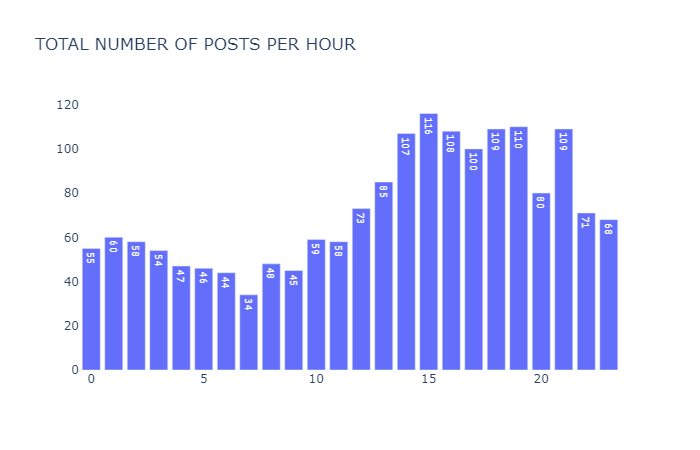

 THE TOP 5 HOURS PER POST QUANTITY ARE:  
15:00: 116
19:00: 110
21:00: 109
18:00: 109
16:00: 108


In [12]:
table_display = []
hours_plot = []
for key in counts_by_hour:
        key_val_as_tuple = (counts_by_hour[key], key)
        hours_tuple = (int(key),counts_by_hour[key])
        table_display.append(key_val_as_tuple)
        hours_plot.append(hours_tuple)
        table_sorted = sorted(table_display, reverse = True)
        table_sorted_hours = sorted(hours_plot, reverse = False)

posts = []
hours = []
for key in table_sorted_hours:
    post = key[1]
    hour = key[0]
    posts.append(post)
    hours.append(hour)
    
fig = go.Figure(data=[go.Bar(
            x=hours, y=posts,
            text=posts,
            textposition='auto',
        )])
fig.update_layout(title = 'TOTAL NUMBER OF POSTS PER HOUR',plot_bgcolor='rgba(0,0,0,0)',)
fig.show(renderer = 'png')

print("\033[1m",'THE TOP 5 HOURS PER POST QUANTITY ARE: ',"\033[0m")
for entry in table_sorted[:5]:
        print(entry[1]+':00' ':', "{:,.0f}".format(entry[0]))

We have seen that from 15h to 21h is when people publish more on Hacker News. Now we will show the number of **average number of 
comments per hour**. 

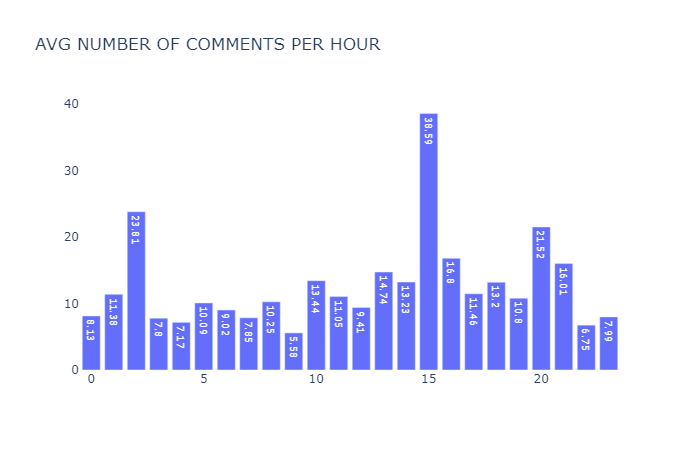

In [15]:
#We transform it to a tuple to be able to sort it. 
table_display2 = []
hours_avg_plot = []
for key in comments_by_hour:
        number_posts = counts_by_hour[key]
        key_val_as_tuple = (comments_by_hour[key]/number_posts, key) #We have to calculate de avg number of comments.
        hours_tuple_avg = (key,comments_by_hour[key]/number_posts)
        table_display2.append(key_val_as_tuple)
        hours_avg_plot.append(hours_tuple_avg)
        table_sorted2 = sorted(table_display2, reverse = True)
        plot_hours_sorted = sorted(hours_avg_plot,reverse = False)
avg_posts = []
hours2 = []
for key in plot_hours_sorted:
    post = round(key[1],2)
    hour = key[0]
    avg_posts.append(post)
    hours2.append(hour)
    
fig2 = go.Figure(data=[go.Bar(
            x=hours2, y=avg_posts,
            text= avg_posts,
            textposition='auto',
            
        )])
fig2.update_layout(title = 'AVG NUMBER OF COMMENTS PER HOUR',plot_bgcolor='rgba(0,0,0,0)',)
fig2.show(renderer = 'png')


We will see the top five hour to post an ask post to recieve more comments. As we are not based on East coast, we will change it to Central Europe timezone. 

In [11]:
print("\033[1m",'East Coast timezone:',"\033[0m")
for avg, hour in table_sorted2[0:5]:
    hour = str(hour)
    print('{}: {:.2f} average comments per post'.format(
        dt.datetime.strptime(hour,'%H').strftime('%H:%M'),avg
             )
         )
print('\n')
print("\033[1m",'Central Europe timezone:',"\033[0m")
table_here = []
for avg, hour in table_sorted2:
    hour = str(hour)
    hour = dt.datetime.strptime(hour,'%H')
    hour_here = hour + dt.timedelta(hours=5)
    hour_here = hour_here.hour
    tuple_here = (avg,hour_here)
    table_here.append(tuple_here)

for avg, hour_here in table_here[0:5]:
    hour_here = str(hour_here)
    print('{}: {:.2f} average comments per post'.format(
        dt.datetime.strptime(hour_here,'%H').strftime('%H:%M'),avg
             )
         )


 East Coast timezone: 
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


 Central Europe timezone: 
20:00: 38.59 average comments per post
07:00: 23.81 average comments per post
01:00: 21.52 average comments per post
21:00: 16.80 average comments per post
02:00: 16.01 average comments per post


The "hottest" hour to post is the 15.00 East Coast. It is also when more posts are published, so we can affirm that it is the most active hacker news hour. In general terms, hacker news has **more comments and posts in the afternoon than in the morning**. Not an early bird platform. 

Now, is the turn of **analyzing by weekday**.

We will start calculating the total number of posts.

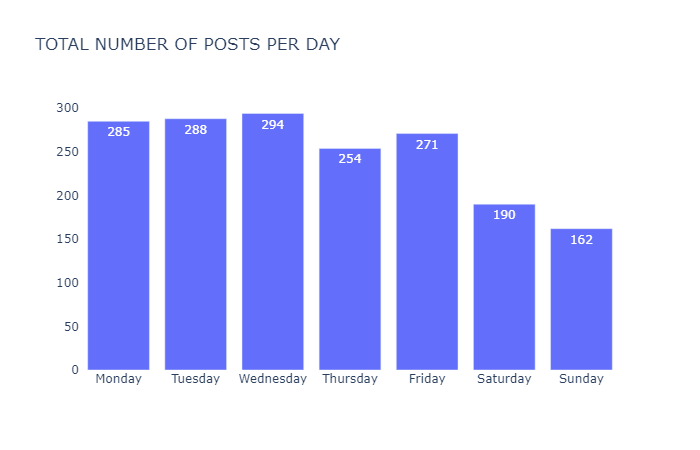

Wednesday:294 posts published
Tuesday:288 posts published
Monday:285 posts published
Friday:271 posts published
Thursday:254 posts published
Saturday:190 posts published
Sunday:162 posts published


In [14]:
table_display_weekday = []
table_display_weekday_plot = {}
for key in counts_by_day:
        key_val_as_tuple_day = (counts_by_day[key], key)
        table_display_weekday_plot[key] = counts_by_day[key]
        table_display_weekday.append(key_val_as_tuple_day)
        table_sorted_weekday = sorted(table_display_weekday, reverse = True)

weekdays = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = []
for day in weekdays:
    count = int(table_display_weekday_plot[day])
    y.append(count)
fig3 = go.Figure(data=[go.Bar(
            x=weekdays, y=y,
            text= y,
            textposition='auto',
            
        )])
fig3.update_layout(title = 'TOTAL NUMBER OF POSTS PER DAY',plot_bgcolor='rgba(0,0,0,0)',)
fig3.show(renderer = 'png')
for entry in table_sorted_weekday:
        print("{}:{:,.0f} posts published".format(entry[1],entry[0]))

Now, the **average of comments per post**.

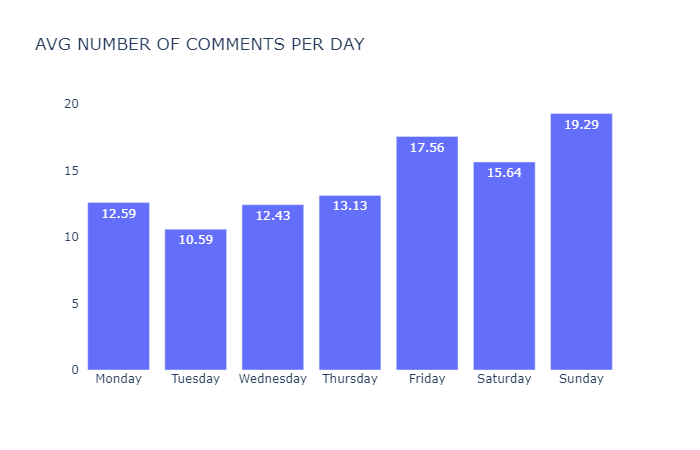

Sunday: 19.29 average comments per post
Friday: 17.56 average comments per post
Saturday: 15.64 average comments per post
Thursday: 13.13 average comments per post
Monday: 12.59 average comments per post
Wednesday: 12.43 average comments per post
Tuesday: 10.59 average comments per post


In [13]:
table_display_weekday_2 = []
table_display_weekday_2_plot = {}
for key in comments_by_day:
    avg_comments = comments_by_day[key]/counts_by_day[key]
    key_tuple = (avg_comments,key)
    table_display_weekday_2_plot[key] = comments_by_day[key]/counts_by_day[key]
    table_display_weekday_2.append(key_tuple)
    sorted_list = sorted(table_display_weekday_2,reverse = True)
    
weekdays = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = []
for day in weekdays:
    avg = round(float(table_display_weekday_2_plot[day]),2)
    y.append(avg)
fig4 = go.Figure(data=[go.Bar(
            x=weekdays, y=y,
            text= y,
            textposition='auto',
            
        )])
fig4.update_layout(title = 'AVG NUMBER OF COMMENTS PER DAY',plot_bgcolor='rgba(0,0,0,0)',)
fig4.show(renderer = 'png')
    
for avg,day in sorted_list:
    print('{}: {:.2f} average comments per post'.format(day,avg
             )
         )

In this case, there is entirely different information between the number of posts and the average number of comments. We can see that the days with more posts are the beginning of the week, while the posts with more comments are made on the weekend.

## CONCLUSION

**The category with more engagement in Hacker News is the Ask category**. However, the posts with more comments are those who talk about more social issues. We can't categorize those comments, so we haven't dug more into them. 

If we talk about the **best day to publish is definitely during the weekend**. I have to admit that it has surprised me. We have more posts during the week, but in terms of engagement, the weekend's days are the best, with the Sunday on the top. 

The **best hour and the most active hour in the platform is the 15.00 in East Coast time** or 20.00 in Central Europe timezone. 